<a href="https://colab.research.google.com/github/trDalmi/Data-Science-Portfolio/blob/main/Road_Symbols_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 117.80 MiB | 10.43 MiB/s, done.
Updating files: 100% (4/4), done.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [4]:
np.random.seed(0)

Pickle files are the serialised data in python.
## Deserialising them:


In [5]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

In [6]:
print(type(train_data))

<class 'dict'>


In [7]:
x_train,y_train = train_data['features'] , train_data['labels']
x_val,y_val = val_data['features'] , val_data['labels']
x_test,y_test = test_data['features'] , test_data['labels']

In [8]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [9]:
assert(x_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(x_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(x_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."

In [10]:
assert(x_train.shape[1:] == (32,32,3)),"The dimension of the images are not 32 x 32 x 3"
assert(x_val.shape[1:] == (32,32,3)),"The dimension of the images are not 32 x 32 x 3"
assert(x_test.shape[1:] == (32,32,3)),"The dimension of the images are not 32 x 32 x 3"

In [11]:
df = pd.read_csv('german-traffic-signs/signnames.csv')

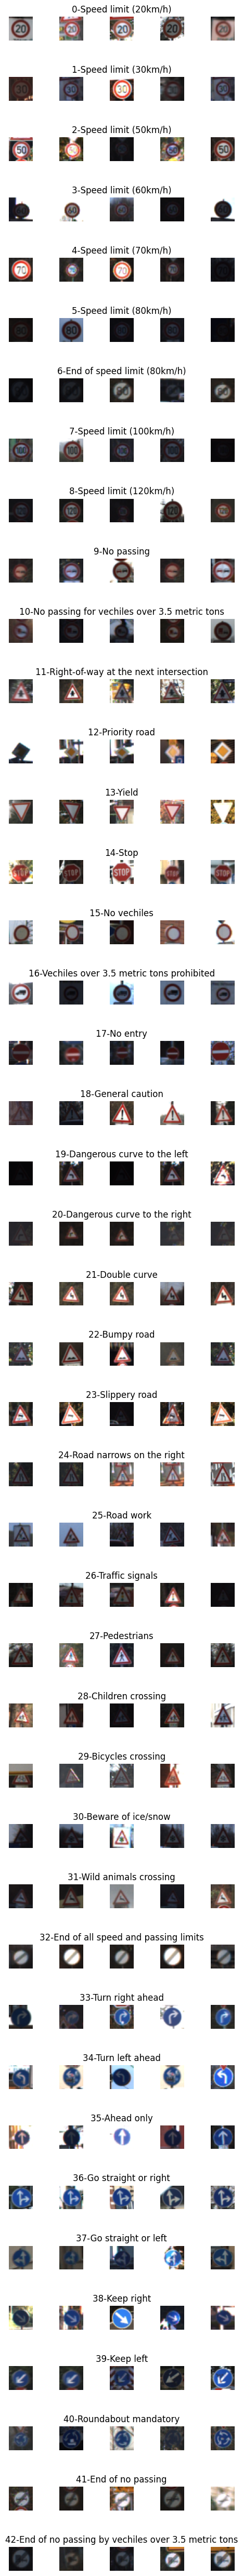

In [12]:
num_of_samples = []

cols = 5
num_classes = 43
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
for i in range(cols):
    for j,row in df.iterrows():
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


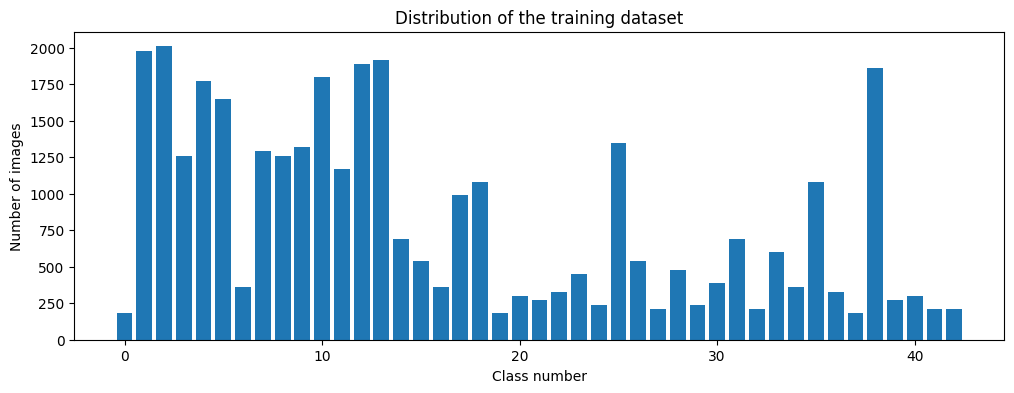

In [13]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


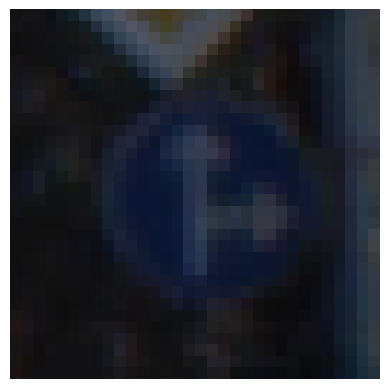

In [14]:
import cv2
plt.imshow(x_train[1000])
plt.axis("off")
print(x_train[1000].shape)
print(y_train[1000])

In [15]:
def greyscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return img

(32, 32)

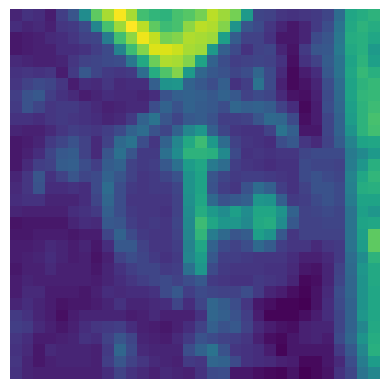

In [16]:
img = greyscale(x_train[1000])
plt.imshow(img)
plt.axis("off")
img.shape

In [17]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

(32, 32)


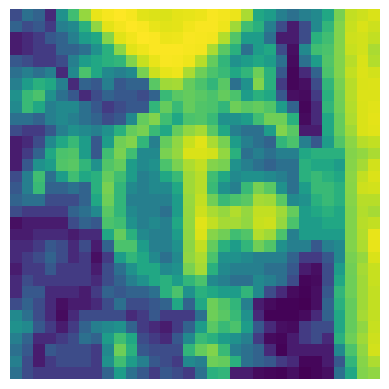

In [18]:
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [19]:
def preprocessing(img):
  img = greyscale(img)
  img = equalize(img)
  img = img/255  # Normalize
  return img

In [20]:
x_train = np.array(list(map(preprocessing , x_train)))
x_val = np.array(list(map(preprocessing , x_val)))
x_test = np.array(list(map(preprocessing , x_test)))

(-0.5, 31.5, 31.5, -0.5)

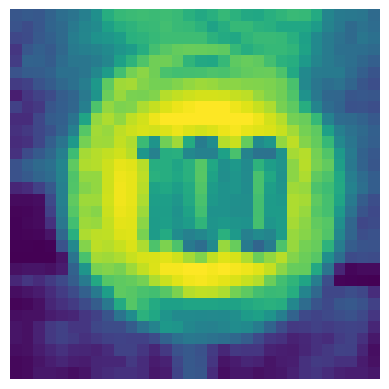

In [21]:
plt.imshow(x_train[random.randint(0,len(x_train)-1)])
plt.axis("off")

In [22]:
x_train = x_train.reshape(34799,32,32,1)
x_val = x_val.reshape(4410,32,32,1)
x_test = x_test.reshape(12630,32,32,1)

In [23]:
# One hot encoding the variable:
y_train = to_categorical(y_train,43)
y_val = to_categorical(y_val,43)
y_test = to_categorical(y_test,43)

In [24]:
def Model():
  model = Sequential()
  model.add(Conv2D(30, (5,5),input_shape = (32,32,1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation = 'softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [25]:
model = Model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 540)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         270,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 296,888 (1.13 MB)

 Trainable params: 296,888 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
history = model.fit(x_train,y_train,batch_size=400,epochs=10,validation_data=(x_val,y_val),verbose = 1,shuffle=1)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.1448 - loss: 3.1899 - val_accuracy: 0.7032 - val_loss: 0.9660
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7431 - loss: 0.8171 - val_accuracy: 0.8420 - val_loss: 0.5212
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8592 - loss: 0.4507 - val_accuracy: 0.8658 - val_loss: 0.4425
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8986 - loss: 0.3252 - val_accuracy: 0.8943 - val_loss: 0.3459
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9173 - loss: 0.2594 - val_accuracy: 0.9086 - val_loss: 0.2905
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9281 - loss: 0.2179 - val_accuracy: 0.8912 - val_loss: 0.3910
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9379 - loss: 0.1912 - val_accuracy: 0.9249 - val_loss: 0.2885
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9458 - loss: 0.1651 - val_accuracy: 0.9052 - val_los

Text(0.5, 0, 'epoch')

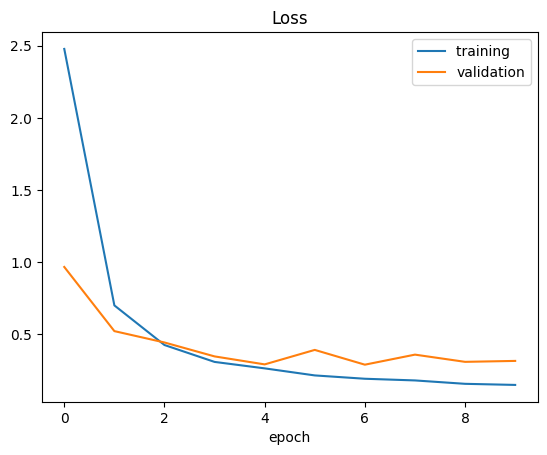

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training ','validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

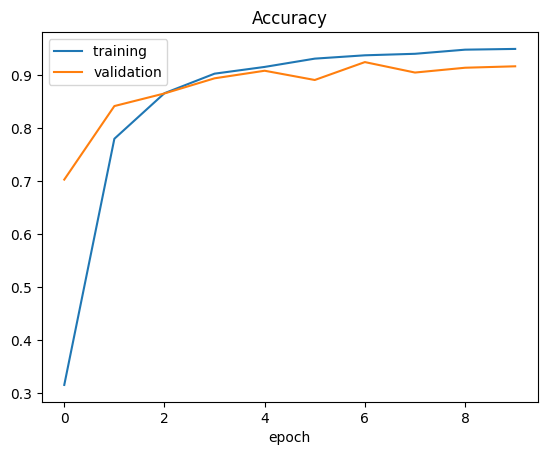

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training ','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [29]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('Test Score' ,score[0])
print('Test Accuracu', score[1])

Test Score 0.40240588784217834
Test Accuracu 0.9130641222000122
